# **Neural Networks implemented in Python's Tensor flow**

## **Part 2, basic algorithms:**

### **Section 1, Linear Regression:**

    Lets import Tensorflow & Numpy again

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

    for this section we will also need PyPlot & SciKit Learn

In [14]:
import matplotlib.pyplot as plt
import sklearn

    Here is some sample data to make a simple Linear Regression on

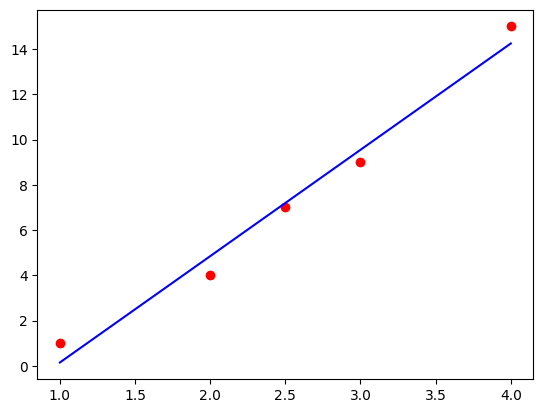

In [13]:
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro');   coefficients = np.polyfit(x, y, 1); polynomial = np.poly1d(coefficients)
line_of_best_fit = polynomial(x);   plt.plot(x, line_of_best_fit, 'b-')

    lets load our dataset for today

In [76]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dftest = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')

dftrain.head(); dftest.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [75]:
ytrain = pd.DataFrame(dftrain); ytrain = ytrain.pop('survived')
ytest = pd.DataFrame(dftest); ytest = ytest.pop('survived')

ytrain.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [77]:
categorical = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone']; numerical = ['age', 'fare']

### **Now, lets train:**